In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def func(c, N, h):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    
    for j in range(N):
        c_jm1 = c[j - 1] if j > 0 else 0.0      # c_(j - 1)
        c_jp1 = c[j + 1] if j < N - 1 else 0.0  # c_(j + 1)
        c_j = c[j]
        
        s1 += c_j**2  - c_j * c_jm1 - c_j * c_jp1
        s2 += 1 / 3 * c_j**2 + 1 / 6 * c_j * c_jm1 + 1 / 6 * c_j * c_jp1
        s3 += np.arctan((j + 1) * h) * np.sin(2 * c_j)
        s4 += c_j
        
    result = 1 / h * s1 + 9 * h * s2 - h / 2 * s3 - h * s4    
    
    return result
    

def grad(c, N, h):
    result = np.copy(c)
    
    # Рассчитаем по очереди все c_j
    for j in range(N):
        c_jm1 = c[j - 1] if j > 0 else 0.0      # c_(j - 1)
        c_jp1 = c[j + 1] if j < N - 1 else 0.0  # c_(j + 1)
        c_j = c[j]
        
        s1 = 2 * c_j - c_jm1 - c_jp1
        s2 = 2 / 3 * c_j + 1 / 6 * c_jm1 + 1 / 6 * c_jp1
        s3 = 0
                
        for k in range(N):
            s3 += np.arctan((k + 1) * h) * np.cos(2 * c[k])
        
        result[j] = 1 / h * s1 + 9 * h * s2 - h * s3 - h
        
    return result
        

In [40]:
def gradient_descent(c_0, func, grad, N, h, tolerance, max_steps=100):    
    c_k = np.copy(c_0)
    c_kp1 = np.array(len(c_0))
    
    for i in range(max_steps):
        w = 1             
        
        c_kp1 = c_k - w * h * grad(c_k, N, h)
        
        while func(c_kp1, N, h) > func(c_k, N ,h):
            w = w / 2
            c_kp1 = c_k - w * h * grad(c_k, N, h)
        
        if np.linalg.norm(c_kp1 - c_k) < tolerance:
            break        
            
        c_k = np.copy(c_kp1)

    return c_kp1

In [45]:
N = 99
xs = np.linspace(0,1,N)
h = 1/(N - 1)
j = np.arange(N)
c_0 = (-np.exp(3-3*j*h) - np.exp(3*j*h) + 1 + np.exp(3))/(9 + 9* np.exp(3))

In [46]:
def e(xs):
    res = np.copy(xs)
    
    for i, x in enumerate(xs):
        if -1 <= x and x < 0:
            res[i] = x + 1
        elif 0 <= x and x <= 1:
            res[i] = 1 - x
        else: 
            res[i] = 0
            
    return res

In [47]:
def u(x,c,e):
    result = 0
    for i in range(N):
        result += c[i] * e(x/h-i+1)
    return result

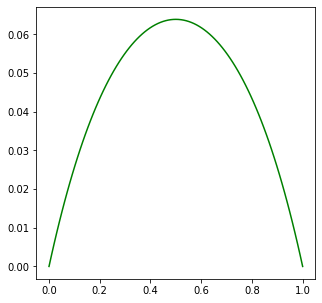

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(xs, c_0, 'g')

In [41]:
tol = 0.001
res = gradient_descent(c_0, func, grad, N, h, tol, max_steps=10000)


step =  0 diff =  0.045590855363755775
step =  1 diff =  0.04528448185438778
step =  2 diff =  0.04789238301732203
step =  3 diff =  0.06252244097112546
step =  4 diff =  0.11991069479736188
step =  5 diff =  0.14627716946361477
step =  6 diff =  0.12199171277039127
step =  7 diff =  0.21188870554548364
step =  8 diff =  0.2880799102270269
step =  9 diff =  0.2583551815506895
step =  10 diff =  0.23508405635908602
step =  11 diff =  0.21628373270393725
step =  12 diff =  0.20072652775777694
step =  13 diff =  0.1876073968200861
step =  14 diff =  0.17637225176573496
step =  15 diff =  0.166627383025695
step =  16 diff =  0.15808305883611312
step =  17 diff =  0.15052237346003175
step =  18 diff =  0.1437779487572896
step =  19 diff =  0.1377198525880381
step =  20 diff =  0.13224410852655752
step =  21 diff =  0.12726788272160197
step =  22 diff =  0.24544579018797724
step =  23 diff =  0.35512241309463827
step =  24 diff =  0.34314122949638265
step =  25 diff =  0.3320728998954925
ste

step =  213 diff =  0.19613123098787824
step =  214 diff =  0.19546847542255208
step =  215 diff =  0.1948113337199178
step =  216 diff =  0.19415960434269097
step =  217 diff =  0.19351335104692272
step =  218 diff =  0.19287237628366305
step =  219 diff =  0.19223674470617994
step =  220 diff =  0.19160626263115613
step =  221 diff =  0.19098099551838865
step =  222 diff =  0.19036075343300501
step =  223 diff =  0.18974560255586934
step =  224 diff =  0.18913535658855699
step =  225 diff =  0.18853008235244761
step =  226 diff =  0.18792959707845852
step =  227 diff =  0.1873339681525507
step =  228 diff =  0.18674301623248962
step =  229 diff =  0.18615680919722707
step =  230 diff =  0.18557517103323526
step =  231 diff =  0.1849981700449566
step =  232 diff =  0.1844256334535395
step =  233 diff =  0.1838576299252688
step =  234 diff =  0.18329398982582323
step =  235 diff =  0.18273478212331398
step =  236 diff =  0.18217984024147973
step =  237 diff =  0.18162923339366588
step 

step =  424 diff =  0.37140267545146993
step =  425 diff =  0.37091757464814856
step =  426 diff =  0.3704352861418285
step =  427 diff =  0.369955826474582
step =  428 diff =  0.3694791404416692
step =  429 diff =  0.3690052443916479
step =  430 diff =  0.3685340838272968
step =  431 diff =  0.36806567490515735
step =  432 diff =  0.36759996382581
step =  433 diff =  0.3671369665553391
step =  434 diff =  0.36667662998259637
step =  435 diff =  0.3662189698848254
step =  436 diff =  0.36576393382979916
step =  437 diff =  0.36531153740758726
step =  438 diff =  0.3648617288557088
step =  439 diff =  0.3644145235787735
step =  440 diff =  0.36396987047504015
step =  441 diff =  0.36352778476541503
step =  442 diff =  0.363088216000054
step =  443 diff =  0.3626511792179541
step =  444 diff =  0.362216624612484
step =  445 diff =  0.36178456704256107
step =  446 diff =  0.36135495733623574
step =  447 diff =  0.3609278101742047
step =  448 diff =  0.36050307701081824
step =  449 diff = 

step =  633 diff =  0.3100271488282315
step =  634 diff =  0.3098516056624878
step =  635 diff =  0.3096766938793353
step =  636 diff =  0.30950239900222465
step =  637 diff =  0.3093287262214078
step =  638 diff =  0.30915566124581756
step =  639 diff =  0.3089832092174938
step =  640 diff =  0.30881135602842014
step =  641 diff =  0.30864010677300463
step =  642 diff =  0.30846944752388117
step =  643 diff =  0.3082993833283953
step =  644 diff =  0.30812990043746047
step =  645 diff =  0.30796100385191966
step =  646 diff =  0.30779267999862453
step =  647 diff =  0.3076249338324661
step =  648 diff =  0.30745775195392205
step =  649 diff =  0.3072911392724722
step =  650 diff =  0.30712508255993737
step =  651 diff =  0.30695958668091805
step =  652 diff =  0.30679463857632355
step =  653 diff =  0.3066302430663974
step =  654 diff =  0.30646638725891145
step =  655 diff =  0.30630307593026657
step =  656 diff =  0.3061402963528989
step =  657 diff =  0.3059780532598717
step =  658

step =  844 diff =  0.28183705010514915
step =  845 diff =  0.28172925058004894
step =  846 diff =  0.28162159016940774
step =  847 diff =  0.28151407097941933
step =  848 diff =  0.28140668913803996
step =  849 diff =  0.28129944673413804
step =  850 diff =  0.2811923399410356
step =  851 diff =  0.2810853708304217
step =  852 diff =  0.28097853562039776
step =  853 diff =  0.280871836365617
step =  854 diff =  0.2807652693283817
step =  855 diff =  0.28065883654645196
step =  856 diff =  0.28055253432576027
step =  857 diff =  0.28044636468731515
step =  858 diff =  0.2803403239801166
step =  859 diff =  0.2802344142085612
step =  860 diff =  0.28012863176416114
step =  861 diff =  0.2800229786348404
step =  862 diff =  0.2799174512540758
step =  863 diff =  0.27981205159345585
step =  864 diff =  0.27970677612788214
step =  865 diff =  0.2796016268127438
step =  866 diff =  0.279496600163835
step =  867 diff =  0.27939169812048026
step =  868 diff =  0.2792869172388406
step =  869 d

step =  1056 diff =  0.2611602479914115
step =  1057 diff =  0.2610699556062681
step =  1058 diff =  0.26097971147223026
step =  1059 diff =  0.2608895164677787
step =  1060 diff =  0.2607993693873906
step =  1061 diff =  0.26070927110231096
step =  1062 diff =  0.2606192204192971
step =  1063 diff =  0.2605292182024177
step =  1064 diff =  0.26043926327056893
step =  1065 diff =  0.260349356480702
step =  1066 diff =  0.2602594966637127
step =  1067 diff =  0.26016968466949236
step =  1068 diff =  0.26007991934079944
step =  1069 diff =  0.25999020152052316
step =  1070 diff =  0.25990053006314867
step =  1071 diff =  0.25981090580462063
step =  1072 diff =  0.259721327611017
step =  1073 diff =  0.25963179631139405
step =  1074 diff =  0.25954231078329015
step =  1075 diff =  0.2594528718489299
step =  1076 diff =  0.2593634783971821
step =  1077 diff =  0.25927413124349497
step =  1078 diff =  0.25918482928793846
step =  1079 diff =  0.2590955733392401
step =  1080 diff =  0.2590063

step =  1263 diff =  0.24333771654292025
step =  1264 diff =  0.2432552622507389
step =  1265 diff =  0.2431728392989474
step =  1266 diff =  0.24309044723994339
step =  1267 diff =  0.24300808644407954
step =  1268 diff =  0.24292575646778905
step =  1269 diff =  0.24284345767834636
step =  1270 diff =  0.2427611896361797
step =  1271 diff =  0.24267895270551043
step =  1272 diff =  0.24259674645072163
step =  1273 diff =  0.24251457123300693
step =  1274 diff =  0.24243242662066483
step =  1275 diff =  0.24235031297188556
step =  1276 diff =  0.24226822985884344
step =  1277 diff =  0.24218617763675046
step =  1278 diff =  0.24210415588161813
step =  1279 diff =  0.24202216494570433
step =  1280 diff =  0.24194020440881958
step =  1281 diff =  0.24185827462029183
step =  1282 diff =  0.24177637516369252
step =  1283 diff =  0.24169450638544382
step =  1284 diff =  0.24161266787284058
step =  1285 diff =  0.24153085996942303
step =  1286 diff =  0.24144908226617265
step =  1287 diff =

step =  1466 diff =  0.22719807000409764
step =  1467 diff =  0.22712138771630822
step =  1468 diff =  0.2270447318233573
step =  1469 diff =  0.2269681024835808
step =  1470 diff =  0.22689149951128004
step =  1471 diff =  0.2268149230634495
step =  1472 diff =  0.226738372955912
step =  1473 diff =  0.2266618493443316
step =  1474 diff =  0.2265853520460384
step =  1475 diff =  0.22650888121537707
step =  1476 diff =  0.22643243667117158
step =  1477 diff =  0.22635601856645768
step =  1478 diff =  0.22627962672153987
step =  1479 diff =  0.22620326128815588
step =  1480 diff =  0.22612692208807725
step =  1481 diff =  0.22605060927175435
step =  1482 diff =  0.2259743226624125
step =  1483 diff =  0.2258980624092248
step =  1484 diff =  0.22582182833685743
step =  1485 diff =  0.22574562059321734
step =  1486 diff =  0.2256694390043981
step =  1487 diff =  0.22559328371705042
step =  1488 diff =  0.2255171545586831
step =  1489 diff =  0.2254410516747009
step =  1490 diff =  0.22536

step =  1672 diff =  0.21194305431274363
step =  1673 diff =  0.21187157791830125
step =  1674 diff =  0.2118001257016837
step =  1675 diff =  0.2117286977275551
step =  1676 diff =  0.21165729391335206
step =  1677 diff =  0.21158591432316187
step =  1678 diff =  0.21151455887503864
step =  1679 diff =  0.21144322763249745
step =  1680 diff =  0.21137192051420442
step =  1681 diff =  0.21130063758310708
step =  1682 diff =  0.2112293787584783
step =  1683 diff =  0.2111581441027029
step =  1684 diff =  0.2110869335356557
step =  1685 diff =  0.21101574711916304
step =  1686 diff =  0.21094458477369632
step =  1687 diff =  0.2108734465605282
step =  1688 diff =  0.21080233240072174
step =  1689 diff =  0.2107312423550006
step =  1690 diff =  0.21066017634501444
step =  1691 diff =  0.21058913443094207
step =  1692 diff =  0.21051811653501498
step =  1693 diff =  0.21044712271687174
step =  1694 diff =  0.2103761528993205
step =  1695 diff =  0.21030520714146383
step =  1696 diff =  0.2

step =  1877 diff =  0.19778445855589805
step =  1878 diff =  0.19771776747465783
step =  1879 diff =  0.19765109891744345
step =  1880 diff =  0.19758445284426426
step =  1881 diff =  0.1975178292794607
step =  1882 diff =  0.19745122818330765
step =  1883 diff =  0.19738464957989693
step =  1884 diff =  0.1973180934297672
step =  1885 diff =  0.19725155975676364
step =  1886 diff =  0.197185048521686
step =  1887 diff =  0.1971185597481353
step =  1888 diff =  0.19705209339717067
step =  1889 diff =  0.19698564949215067
step =  1890 diff =  0.1969192279943915
step =  1891 diff =  0.19685282892701123
step =  1892 diff =  0.19678645225158123
step =  1893 diff =  0.19672009799098117
step =  1894 diff =  0.19665376610703544
step =  1895 diff =  0.19658745662238702
step =  1896 diff =  0.19652116949911141
step =  1897 diff =  0.19645490475961694
step =  1898 diff =  0.19638866236622826
step =  1899 diff =  0.1963224423411209
step =  1900 diff =  0.1962562446468664
step =  1901 diff =  0.1

step =  2082 diff =  0.18457270387459074
step =  2083 diff =  0.1845104696134248
step =  2084 diff =  0.18444825633304207
step =  2085 diff =  0.18438606404054894
step =  2086 diff =  0.18432389271468086
step =  2087 diff =  0.18426174236243678
step =  2088 diff =  0.18419961296266968
step =  2089 diff =  0.18413750452227212
step =  2090 diff =  0.18407541702021343
step =  2091 diff =  0.18401335046328068
step =  2092 diff =  0.18395130483055905
step =  2093 diff =  0.18388928012873104
step =  2094 diff =  0.18382727633699641
step =  2095 diff =  0.18376529346193382
step =  2096 diff =  0.18370333148285695
step =  2097 diff =  0.1836413904062417
step =  2098 diff =  0.18357947021151477
step =  2099 diff =  0.18351757090504975
step =  2100 diff =  0.18345569246638554
step =  2101 diff =  0.18339383490179448
step =  2102 diff =  0.18333199819092666
step =  2103 diff =  0.18327018233995435
step =  2104 diff =  0.183208387328638
step =  2105 diff =  0.18314661316304998
step =  2106 diff = 

step =  2288 diff =  0.17218558447982826
step =  2289 diff =  0.17212752726476485
step =  2290 diff =  0.17206948962286486
step =  2291 diff =  0.1720114715538022
step =  2292 diff =  0.17195347304471695
step =  2293 diff =  0.1718954940952381
step =  2294 diff =  0.17183753469255938
step =  2295 diff =  0.17177959483626537
step =  2296 diff =  0.17172167451360332
step =  2297 diff =  0.17166377372411362
step =  2298 diff =  0.17160589245509641
step =  2299 diff =  0.17154803070604835
step =  2300 diff =  0.17149018846432248
step =  2301 diff =  0.1714323657293718
step =  2302 diff =  0.17137456248860167
step =  2303 diff =  0.17131677874142215
step =  2304 diff =  0.17125901447529043
step =  2305 diff =  0.17120126968957383
step =  2306 diff =  0.17114354437178098
step =  2307 diff =  0.1710858385212371
step =  2308 diff =  0.1710281521255021
step =  2309 diff =  0.17097048518385913
step =  2310 diff =  0.17091283768391877
step =  2311 diff =  0.17085520962492268
step =  2312 diff =  

step =  2494 diff =  0.16062982850579233
step =  2495 diff =  0.1605756677035196
step =  2496 diff =  0.16052152516179485
step =  2497 diff =  0.16046740087724348
step =  2498 diff =  0.16041329484093586
step =  2499 diff =  0.16035920704947992
step =  2500 diff =  0.1603051374939718
step =  2501 diff =  0.1602510861710018
step =  2502 diff =  0.16019705307169213
step =  2503 diff =  0.16014303819261558
step =  2504 diff =  0.16008904152491982
step =  2505 diff =  0.1600350630651606
step =  2506 diff =  0.159981102804511
step =  2507 diff =  0.1599271607395098
step =  2508 diff =  0.15987323686135543
step =  2509 diff =  0.15981933116656963
step =  2510 diff =  0.1597654436463757
step =  2511 diff =  0.1597115742972788
step =  2512 diff =  0.15965772311052745
step =  2513 diff =  0.15960389008261025
step =  2514 diff =  0.15955007520480038
step =  2515 diff =  0.15949627847356984
step =  2516 diff =  0.15944249988021636
step =  2517 diff =  0.15938873942119605
step =  2518 diff =  0.15

step =  2698 diff =  0.14995071414355263
step =  2699 diff =  0.14990015411247756
step =  2700 diff =  0.1498496111285149
step =  2701 diff =  0.14979908518716215
step =  2702 diff =  0.1497485762814319
step =  2703 diff =  0.149698084406816
step =  2704 diff =  0.1496476095563406
step =  2705 diff =  0.14959715172549173
step =  2706 diff =  0.149546710907309
step =  2707 diff =  0.1494962870972726
step =  2708 diff =  0.1494458802884356
step =  2709 diff =  0.14939549047627265
step =  2710 diff =  0.14934511765385017
step =  2711 diff =  0.14929476181663706
step =  2712 diff =  0.14924442295771326
step =  2713 diff =  0.1491941010725422
step =  2714 diff =  0.14914379615421672
step =  2715 diff =  0.14909350819819492
step =  2716 diff =  0.1490432371975831
step =  2717 diff =  0.14899298314783366
step =  2718 diff =  0.14894274604206575
step =  2719 diff =  0.14889252587572677
step =  2720 diff =  0.14884232264194888
step =  2721 diff =  0.14879213633617408
step =  2722 diff =  0.1487

step =  2901 diff =  0.1400287924899467
step =  2902 diff =  0.1399815779109889
step =  2903 diff =  0.13993437925201674
step =  2904 diff =  0.13988719650710238
step =  2905 diff =  0.1398400296714376
step =  2906 diff =  0.1397928787391025
step =  2907 diff =  0.13974574370528814
step =  2908 diff =  0.13969862456408275
step =  2909 diff =  0.13965152131067674
step =  2910 diff =  0.1396044339391661
step =  2911 diff =  0.13955736244474054
step =  2912 diff =  0.13951030682150414
step =  2913 diff =  0.13946326706464574
step =  2914 diff =  0.13941624316827714
step =  2915 diff =  0.13936923512758687
step =  2916 diff =  0.13932224293669457
step =  2917 diff =  0.13927526659078793
step =  2918 diff =  0.13922830608399447
step =  2919 diff =  0.1391813614115015
step =  2920 diff =  0.13913443256744432
step =  2921 diff =  0.1390875195470094
step =  2922 diff =  0.13904062234433964
step =  2923 diff =  0.13899374095462128
step =  2924 diff =  0.138946875372005
step =  2925 diff =  0.13

step =  3103 diff =  0.13080748898081299
step =  3104 diff =  0.13076338361977022
step =  3105 diff =  0.13071929313019637
step =  3106 diff =  0.1306752175068249
step =  3107 diff =  0.13063115674489453
step =  3108 diff =  0.13058711083914393
step =  3109 diff =  0.13054307978481325
step =  3110 diff =  0.13049906357664662
step =  3111 diff =  0.13045506220988573
step =  3112 diff =  0.13041107567927973
step =  3113 diff =  0.13036710398007176
step =  3114 diff =  0.1303231471070165
step =  3115 diff =  0.13027920505535842
step =  3116 diff =  0.13023527781985753
step =  3117 diff =  0.1301913653957597
step =  3118 diff =  0.1301474677778303
step =  3119 diff =  0.13010358496131658
step =  3120 diff =  0.13005971694098914
step =  3121 diff =  0.13001586371209697
step =  3122 diff =  0.12997202526941568
step =  3123 diff =  0.1299282016081956
step =  3124 diff =  0.1298843927232178
step =  3125 diff =  0.12984059860973415
step =  3126 diff =  0.12979681926253092
step =  3127 diff =  0

step =  3307 diff =  0.12211104728659915
step =  3308 diff =  0.12206987417139364
step =  3309 diff =  0.1220287149388987
step =  3310 diff =  0.12198756958432087
step =  3311 diff =  0.1219464381030927
step =  3312 diff =  0.12190532049042485
step =  3313 diff =  0.1218642167417523
step =  3314 diff =  0.1218231268522899
step =  3315 diff =  0.12178205081747473
step =  3316 diff =  0.1217409886325256
step =  3317 diff =  0.12169994029288189
step =  3318 diff =  0.12165890579376644
step =  3319 diff =  0.12161788513062093
step =  3320 diff =  0.12157687829867225
step =  3321 diff =  0.12153588529336432
step =  3322 diff =  0.12149490610992805
step =  3323 diff =  0.12145394074380965
step =  3324 diff =  0.12141298919024392
step =  3325 diff =  0.12137205144467948
step =  3326 diff =  0.12133112750235518
step =  3327 diff =  0.12129021735872182
step =  3328 diff =  0.12124932100902215
step =  3329 diff =  0.12120843844870936
step =  3330 diff =  0.12116756967303036
step =  3331 diff =  

step =  3513 diff =  0.11391591029925546
step =  3514 diff =  0.11387750040105875
step =  3515 diff =  0.11383910345384568
step =  3516 diff =  0.11380071945320021
step =  3517 diff =  0.113762348394806
step =  3518 diff =  0.11372399027425062
step =  3519 diff =  0.1136856450872202
step =  3520 diff =  0.11364731282930546
step =  3521 diff =  0.11360899349619523
step =  3522 diff =  0.11357068708348346
step =  3523 diff =  0.11353239358686158
step =  3524 diff =  0.11349411300192683
step =  3525 diff =  0.11345584532437318
step =  3526 diff =  0.11341759054980138
step =  3527 diff =  0.11337934867390782
step =  3528 diff =  0.11334111969229654
step =  3529 diff =  0.11330290360066646
step =  3530 diff =  0.11326470039462491
step =  3531 diff =  0.11322651006987343
step =  3532 diff =  0.11318833262202264
step =  3533 diff =  0.11315016804677669
step =  3534 diff =  0.1131120163397495
step =  3535 diff =  0.11307387749664782
step =  3536 diff =  0.11303575151308877
step =  3537 diff = 

step =  3717 diff =  0.1063424672297296
step =  3718 diff =  0.10630661092722937
step =  3719 diff =  0.10627076671468345
step =  3720 diff =  0.10623493458799398
step =  3721 diff =  0.10619911454310711
step =  3722 diff =  0.10616330657592812
step =  3723 diff =  0.10612751068240568
step =  3724 diff =  0.10609172685844777
step =  3725 diff =  0.10605595510000568
step =  3726 diff =  0.1060201954029904
step =  3727 diff =  0.1059844477633558
step =  3728 diff =  0.10594871217701582
step =  3729 diff =  0.10591298863992683
step =  3730 diff =  0.10587727714800577
step =  3731 diff =  0.10584157769721164
step =  3732 diff =  0.10580589028346403
step =  3733 diff =  0.10577021490272455
step =  3734 diff =  0.10573455155091581
step =  3735 diff =  0.10569890022400197
step =  3736 diff =  0.10566326091790851
step =  3737 diff =  0.10562763362860218
step =  3738 diff =  0.10559201835201149
step =  3739 diff =  0.10555641508410563
step =  3740 diff =  0.10552082382081603
step =  3741 diff =

step =  3920 diff =  0.09930601125512757
step =  3921 diff =  0.09927252748827889
step =  3922 diff =  0.09923905501140334
step =  3923 diff =  0.09920559382070306
step =  3924 diff =  0.09917214391236374
step =  3925 diff =  0.09913870528259015
step =  3926 diff =  0.09910527792757055
step =  3927 diff =  0.09907186184351213
step =  3928 diff =  0.09903845702660581
step =  3929 diff =  0.09900506347306133
step =  3930 diff =  0.09897168117907222
step =  3931 diff =  0.09893831014085062
step =  3932 diff =  0.09890495035459276
step =  3933 diff =  0.09887160181651322
step =  3934 diff =  0.09883826452281096
step =  3935 diff =  0.09880493846970324
step =  3936 diff =  0.09877162365339139
step =  3937 diff =  0.0987383200700948
step =  3938 diff =  0.09870502771601773
step =  3939 diff =  0.0986717465873823
step =  3940 diff =  0.09863847668039527
step =  3941 diff =  0.09860521799128123
step =  3942 diff =  0.09857197051624951
step =  3943 diff =  0.09853873425152716
step =  3944 diff 

step =  4123 diff =  0.0927351426792193
step =  4124 diff =  0.09270387446234914
step =  4125 diff =  0.09267261678842444
step =  4126 diff =  0.09264136965388685
step =  4127 diff =  0.09261013305518623
step =  4128 diff =  0.09257890698876654
step =  4129 diff =  0.09254769145107998
step =  4130 diff =  0.09251648643857326
step =  4131 diff =  0.09248529194770075
step =  4132 diff =  0.09245410797491146
step =  4133 diff =  0.09242293451666239
step =  4134 diff =  0.09239177156940481
step =  4135 diff =  0.09236061912959785
step =  4136 diff =  0.0923294771936956
step =  4137 diff =  0.0922983457581595
step =  4138 diff =  0.09226722481944588
step =  4139 diff =  0.09223611437401867
step =  4140 diff =  0.09220501441833649
step =  4141 diff =  0.09217392494886567
step =  4142 diff =  0.09214284596206747
step =  4143 diff =  0.09211177745441025
step =  4144 diff =  0.09208071942235764
step =  4145 diff =  0.09204967186238067
step =  4146 diff =  0.09201863477094524
step =  4147 diff =

step =  4328 diff =  0.08654066588429454
step =  4329 diff =  0.0865114863065134
step =  4330 diff =  0.08648231656743297
step =  4331 diff =  0.0864531566637369
step =  4332 diff =  0.08642400659210803
step =  4333 diff =  0.08639486634923202
step =  4334 diff =  0.08636573593179396
step =  4335 diff =  0.08633661533648197
step =  4336 diff =  0.08630750455998308
step =  4337 diff =  0.08627840359898753
step =  4338 diff =  0.08624931245018505
step =  4339 diff =  0.08622023111026816
step =  4340 diff =  0.08619115957592843
step =  4341 diff =  0.08616209784386061
step =  4342 diff =  0.08613304591075871
step =  4343 diff =  0.08610400377331964
step =  4344 diff =  0.08607497142823957
step =  4345 diff =  0.08604594887221759
step =  4346 diff =  0.08601693610195234
step =  4347 diff =  0.08598793311414495
step =  4348 diff =  0.08595893990549609
step =  4349 diff =  0.08592995647270951
step =  4350 diff =  0.08590098281248816
step =  4351 diff =  0.08587201892153767
step =  4352 diff 

step =  4529 diff =  0.08086897842198679
step =  4530 diff =  0.08084171121041793
step =  4531 diff =  0.08081445319274322
step =  4532 diff =  0.08078720436586277
step =  4533 diff =  0.0807599647266775
step =  4534 diff =  0.08073273427208959
step =  4535 diff =  0.08070551299900221
step =  4536 diff =  0.08067830090431954
step =  4537 diff =  0.08065109798494693
step =  4538 diff =  0.08062390423779058
step =  4539 diff =  0.08059671965975766
step =  4540 diff =  0.08056954424775674
step =  4541 diff =  0.08054237799869723
step =  4542 diff =  0.08051522090948963
step =  4543 diff =  0.08048807297704533
step =  4544 diff =  0.08046093419827682
step =  4545 diff =  0.08043380457009774
step =  4546 diff =  0.08040668408942288
step =  4547 diff =  0.08037957275316775
step =  4548 diff =  0.08035247055824914
step =  4549 diff =  0.08032537750158474
step =  4550 diff =  0.08029829358009338
step =  4551 diff =  0.08027121879069468
step =  4552 diff =  0.08024415313030962
step =  4553 diff

step =  4733 diff =  0.07549258628736148
step =  4734 diff =  0.0754671318750228
step =  4735 diff =  0.07544168604534258
step =  4736 diff =  0.07541624879542758
step =  4737 diff =  0.07539082012238447
step =  4738 diff =  0.07536540002332161
step =  4739 diff =  0.07533998849534752
step =  4740 diff =  0.07531458553557271
step =  4741 diff =  0.07528919114110778
step =  4742 diff =  0.07526380530906521
step =  4743 diff =  0.07523842803655748
step =  4744 diff =  0.07521305932069886
step =  4745 diff =  0.07518769915860378
step =  4746 diff =  0.07516234754738872
step =  4747 diff =  0.07513700448416999
step =  4748 diff =  0.07511166996606569
step =  4749 diff =  0.07508634399019427
step =  4750 diff =  0.07506102655367596
step =  4751 diff =  0.07503571765363103
step =  4752 diff =  0.07501041728718168
step =  4753 diff =  0.0749851254514501
step =  4754 diff =  0.07495984214356025
step =  4755 diff =  0.07493456736063626
step =  4756 diff =  0.07490930109980423
step =  4757 diff 

step =  4939 diff =  0.07042611523695749
step =  4940 diff =  0.07040236912538807
step =  4941 diff =  0.07037863102047631
step =  4942 diff =  0.07035490091952305
step =  4943 diff =  0.07033117881982892
step =  4944 diff =  0.07030746471869675
step =  4945 diff =  0.0702837586134292
step =  4946 diff =  0.07026006050133064
step =  4947 diff =  0.07023637037970533
step =  4948 diff =  0.07021268824585968
step =  4949 diff =  0.07018901409709978
step =  4950 diff =  0.07016534793073387
step =  4951 diff =  0.07014168974406991
step =  4952 diff =  0.07011803953441774
step =  4953 diff =  0.07009439729908724
step =  4954 diff =  0.07007076303539032
step =  4955 diff =  0.07004713674063844
step =  4956 diff =  0.07002351841214503
step =  4957 diff =  0.06999990804722375
step =  4958 diff =  0.06997630564319009
step =  4959 diff =  0.06995271119735907
step =  4960 diff =  0.069929124707048
step =  4961 diff =  0.06990554616957395
step =  4962 diff =  0.06988197558225587
step =  4963 diff =

step =  5140 diff =  0.06581054045801545
step =  5141 diff =  0.0657883506150726
step =  5142 diff =  0.06576616825404899
step =  5143 diff =  0.0657439933724213
step =  5144 diff =  0.06572182596766822
step =  5145 diff =  0.06569966603726825
step =  5146 diff =  0.06567751357870162
step =  5147 diff =  0.06565536858944848
step =  5148 diff =  0.06563323106699093
step =  5149 diff =  0.06561110100881067
step =  5150 diff =  0.06558897841239156
step =  5151 diff =  0.06556686327521714
step =  5152 diff =  0.06554475559477288
step =  5153 diff =  0.06552265536854383
step =  5154 diff =  0.06550056259401722
step =  5155 diff =  0.06547847726868
step =  5156 diff =  0.06545639939002099
step =  5157 diff =  0.0654343289555288
step =  5158 diff =  0.06541226596269396
step =  5159 diff =  0.0653902104090068
step =  5160 diff =  0.06536816229195962
step =  5161 diff =  0.0653461216090443
step =  5162 diff =  0.0653240883577548
step =  5163 diff =  0.06530206253558485
step =  5164 diff =  0.06

step =  5345 diff =  0.06141456009986238
step =  5346 diff =  0.06139385248321745
step =  5347 diff =  0.06137315184871766
step =  5348 diff =  0.06135245819400924
step =  5349 diff =  0.061331771516738354
step =  5350 diff =  0.06131109181455282
step =  5351 diff =  0.061290419085100224
step =  5352 diff =  0.06126975332603008
step =  5353 diff =  0.061249094534991624
step =  5354 diff =  0.06122844270963583
step =  5355 diff =  0.061207797847613675
step =  5356 diff =  0.061187159946577814
step =  5357 diff =  0.0611665290041804
step =  5358 diff =  0.06114590501807571
step =  5359 diff =  0.06112528798591781
step =  5360 diff =  0.06110467790536251
step =  5361 diff =  0.061084074774065356
step =  5362 diff =  0.061063478589683695
step =  5363 diff =  0.06104288934987463
step =  5364 diff =  0.06102230705229715
step =  5365 diff =  0.061001731694610074
step =  5366 diff =  0.06098116327447392
step =  5367 diff =  0.06096060178954893
step =  5368 diff =  0.06094004723749719
step =  5

step =  5548 diff =  0.05735088864672026
step =  5549 diff =  0.05733155120923906
step =  5550 diff =  0.057312220291909785
step =  5551 diff =  0.057292895892533474
step =  5552 diff =  0.0572735780089128
step =  5553 diff =  0.0572542666388504
step =  5554 diff =  0.05723496178015046
step =  5555 diff =  0.05721566343061706
step =  5556 diff =  0.05719637158805596
step =  5557 diff =  0.05717708625027256
step =  5558 diff =  0.05715780741507408
step =  5559 diff =  0.057138535080267616
step =  5560 diff =  0.057119269243661806
step =  5561 diff =  0.05710000990306517
step =  5562 diff =  0.05708075705628793
step =  5563 diff =  0.057061510701139885
step =  5564 diff =  0.05704227083543272
step =  5565 diff =  0.05702303745697793
step =  5566 diff =  0.05700381056358857
step =  5567 diff =  0.056984590153077525
step =  5568 diff =  0.056965376223259534
step =  5569 diff =  0.056946168771948955
step =  5570 diff =  0.05692696779696173
step =  5571 diff =  0.05690777329611363
step =  55

step =  5750 diff =  0.05357416574351219
step =  5751 diff =  0.0535561017325593
step =  5752 diff =  0.05353804381238739
step =  5753 diff =  0.05351999198094228
step =  5754 diff =  0.05350194623617131
step =  5755 diff =  0.05348390657602179
step =  5756 diff =  0.05346587299844254
step =  5757 diff =  0.0534478455013823
step =  5758 diff =  0.05342982408279127
step =  5759 diff =  0.0534118087406195
step =  5760 diff =  0.05339379947281851
step =  5761 diff =  0.05337579627733982
step =  5762 diff =  0.053357799152136336
step =  5763 diff =  0.053339808095160875
step =  5764 diff =  0.0533218231043679
step =  5765 diff =  0.05330384417771153
step =  5766 diff =  0.05328587131314743
step =  5767 diff =  0.05326790450863124
step =  5768 diff =  0.05324994376212008
step =  5769 diff =  0.053231989071570895
step =  5770 diff =  0.05321404043494218
step =  5771 diff =  0.05319609785019228
step =  5772 diff =  0.05317816131528109
step =  5773 diff =  0.05316023082816828
step =  5774 diff

step =  5952 diff =  0.05004615103339874
step =  5953 diff =  0.05002927659013176
step =  5954 diff =  0.050012407836549914
step =  5955 diff =  0.04999554477073449
step =  5956 diff =  0.0499786873907681
step =  5957 diff =  0.04996183569473328
step =  5958 diff =  0.049944989680713786
step =  5959 diff =  0.04992814934679335
step =  5960 diff =  0.049911314691057196
step =  5961 diff =  0.04989448571159043
step =  5962 diff =  0.04987766240647941
step =  5963 diff =  0.04986084477381059
step =  5964 diff =  0.04984403281167186
step =  5965 diff =  0.049827226518150636
step =  5966 diff =  0.04981042589133605
step =  5967 diff =  0.04979363092931701
step =  5968 diff =  0.049776841630183866
step =  5969 diff =  0.049760057992026825
step =  5970 diff =  0.04974328001293753
step =  5971 diff =  0.049726507691007595
step =  5972 diff =  0.049709741024329755
step =  5973 diff =  0.0496929800109969
step =  5974 diff =  0.04967622464910312
step =  5975 diff =  0.049659474936742526
step =  5

step =  6155 diff =  0.046734703146068673
step =  6156 diff =  0.04671894524899678
step =  6157 diff =  0.04670319266513531
step =  6158 diff =  0.046687445392693115
step =  6159 diff =  0.046671703429879016
step =  6160 diff =  0.046655966774902975
step =  6161 diff =  0.04664023542597502
step =  6162 diff =  0.04662450938130645
step =  6163 diff =  0.04660878863910838
step =  6164 diff =  0.046593073197593204
step =  6165 diff =  0.04657736305497347
step =  6166 diff =  0.0465616582094628
step =  6167 diff =  0.046545958659274675
step =  6168 diff =  0.04653026440262403
step =  6169 diff =  0.04651457543772578
step =  6170 diff =  0.04649889176279584
step =  6171 diff =  0.04648321337605029
step =  6172 diff =  0.04646754027570641
step =  6173 diff =  0.04645187245998144
step =  6174 diff =  0.046436209927093845
step =  6175 diff =  0.04642055267526201
step =  6176 diff =  0.04640490070270566
step =  6177 diff =  0.04638925400764435
step =  6178 diff =  0.046373612588298876
step =  6

step =  6354 diff =  0.04370127732795542
step =  6355 diff =  0.04368654223425221
step =  6356 diff =  0.043671812108893315
step =  6357 diff =  0.0436570869502032
step =  6358 diff =  0.043642366756507456
step =  6359 diff =  0.043627651526131885
step =  6360 diff =  0.043612941257403226
step =  6361 diff =  0.04359823594864815
step =  6362 diff =  0.04358353559819447
step =  6363 diff =  0.043568840204370116
step =  6364 diff =  0.04355414976550424
step =  6365 diff =  0.04353946427992588
step =  6366 diff =  0.04352478374596518
step =  6367 diff =  0.043510108161952096
step =  6368 diff =  0.043495437526217914
step =  6369 diff =  0.043480771837094014
step =  6370 diff =  0.043466111092912624
step =  6371 diff =  0.04345145529200623
step =  6372 diff =  0.04343680443270853
step =  6373 diff =  0.043422158513352974
step =  6374 diff =  0.043407517532274065
step =  6375 diff =  0.04339288148780649
step =  6376 diff =  0.04337825037828604
step =  6377 diff =  0.04336362420204845
step =

step =  6557 diff =  0.04080965630430048
step =  6558 diff =  0.04079589620055971
step =  6559 diff =  0.04078214073641824
step =  6560 diff =  0.040768389910311925
step =  6561 diff =  0.04075464372067654
step =  6562 diff =  0.040740902165949104
step =  6563 diff =  0.0407271652445667
step =  6564 diff =  0.04071343295496723
step =  6565 diff =  0.04069970529558853
step =  6566 diff =  0.04068598226486981
step =  6567 diff =  0.040672263861250176
step =  6568 diff =  0.04065855008316968
step =  6569 diff =  0.0406448409290684
step =  6570 diff =  0.04063113639738755
step =  6571 diff =  0.04061743648656833
step =  6572 diff =  0.040603741195052834
step =  6573 diff =  0.040590050521283366
step =  6574 diff =  0.040576364463703114
step =  6575 diff =  0.040562683020755365
step =  6576 diff =  0.0405490061908844
step =  6577 diff =  0.04053533397253455
step =  6578 diff =  0.04052166636415119
step =  6579 diff =  0.040508003364179694
step =  6580 diff =  0.04049434497106642
step =  658

step =  6757 diff =  0.038147942614100684
step =  6758 diff =  0.03813507998070948
step =  6759 diff =  0.038122221684310544
step =  6760 diff =  0.03810936772344183
step =  6761 diff =  0.03809651809664127
step =  6762 diff =  0.038083672802447704
step =  6763 diff =  0.03807083183939996
step =  6764 diff =  0.03805799520603787
step =  6765 diff =  0.03804516290090168
step =  6766 diff =  0.03803233492253203
step =  6767 diff =  0.038019511269469695
step =  6768 diff =  0.03800669194025654
step =  6769 diff =  0.037993876933434555
step =  6770 diff =  0.037981066247546456
step =  6771 diff =  0.03796825988113508
step =  6772 diff =  0.03795545783274425
step =  6773 diff =  0.03794266010091779
step =  6774 diff =  0.03792986668420054
step =  6775 diff =  0.03791707758113733
step =  6776 diff =  0.037904292790273894
step =  6777 diff =  0.03789151231015594
step =  6778 diff =  0.03787873613933019
step =  6779 diff =  0.037865964276343554
step =  6780 diff =  0.037853196719743715
step = 

step =  6961 diff =  0.035611762454234024
step =  6962 diff =  0.03559975496409238
step =  6963 diff =  0.035587751522607805
step =  6964 diff =  0.03557575212841543
step =  6965 diff =  0.03556375678015043
step =  6966 diff =  0.03555176547644882
step =  6967 diff =  0.03553977821594665
step =  6968 diff =  0.03552779499728076
step =  6969 diff =  0.0355158158190882
step =  6970 diff =  0.035503840680006865
step =  6971 diff =  0.03549186957867466
step =  6972 diff =  0.035479902513730226
step =  6973 diff =  0.03546793948381239
step =  6974 diff =  0.03545598048756096
step =  6975 diff =  0.035444025523615634
step =  6976 diff =  0.03543207459061693
step =  6977 diff =  0.03542012768720553
step =  6978 diff =  0.03540818481202294
step =  6979 diff =  0.03539624596371082
step =  6980 diff =  0.035384311140911555
step =  6981 diff =  0.03537238034226751
step =  6982 diff =  0.03536045356642215
step =  6983 diff =  0.03534853081201898
step =  6984 diff =  0.035336612077702105
step =  69

step =  7163 diff =  0.03326662426966358
step =  7164 diff =  0.033255407507688295
step =  7165 diff =  0.03324419452775435
step =  7166 diff =  0.03323298532858667
step =  7167 diff =  0.03322177990891025
step =  7168 diff =  0.03321057826745089
step =  7169 diff =  0.03319938040293442
step =  7170 diff =  0.033188186314087695
step =  7171 diff =  0.033176995999637485
step =  7172 diff =  0.03316580945831125
step =  7173 diff =  0.03315462668883652
step =  7174 diff =  0.03314344768994167
step =  7175 diff =  0.03313227246035522
step =  7176 diff =  0.03312110099880638
step =  7177 diff =  0.033109933304024515
step =  7178 diff =  0.033098769374739774
step =  7179 diff =  0.03308760920968234
step =  7180 diff =  0.03307645280758324
step =  7181 diff =  0.03306530016717348
step =  7182 diff =  0.03305415128718476
step =  7183 diff =  0.03304300616634896
step =  7184 diff =  0.03303186480339879
step =  7185 diff =  0.03302072719706716
step =  7186 diff =  0.03300959334608741
step =  718

step =  7365 diff =  0.031075920258682166
step =  7366 diff =  0.031065442153122826
step =  7367 diff =  0.031054967580546298
step =  7368 diff =  0.031044496539761594
step =  7369 diff =  0.031034029029577744
step =  7370 diff =  0.031023565048804342
step =  7371 diff =  0.031013104596251218
step =  7372 diff =  0.03100264767072889
step =  7373 diff =  0.030992194271047938
step =  7374 diff =  0.03098174439601965
step =  7375 diff =  0.030971298044455507
step =  7376 diff =  0.0309608552151677
step =  7377 diff =  0.030950415906968405
step =  7378 diff =  0.0309399801186705
step =  7379 diff =  0.030929547849087042
step =  7380 diff =  0.030919119097031794
step =  7381 diff =  0.0309086938613185
step =  7382 diff =  0.030898272140761674
step =  7383 diff =  0.030887853934175997
step =  7384 diff =  0.03087743924037665
step =  7385 diff =  0.03086702805817918
step =  7386 diff =  0.0308566203863998
step =  7387 diff =  0.030846216223854576
step =  7388 diff =  0.030835815569360436
step

step =  7564 diff =  0.029058864570113842
step =  7565 diff =  0.029049066570638042
step =  7566 diff =  0.029039271874828708
step =  7567 diff =  0.029029480481571883
step =  7568 diff =  0.02901969238975402
step =  7569 diff =  0.02900990759826168
step =  7570 diff =  0.0290001261059823
step =  7571 diff =  0.028990347911803403
step =  7572 diff =  0.028980573014613105
step =  7573 diff =  0.02897080141329954
step =  7574 diff =  0.028961033106751497
step =  7575 diff =  0.028951268093858003
step =  7576 diff =  0.02894150637350856
step =  7577 diff =  0.028931747944592905
step =  7578 diff =  0.028921992806001422
step =  7579 diff =  0.02891224095662446
step =  7580 diff =  0.02890249239535309
step =  7581 diff =  0.028892747121078657
step =  7582 diff =  0.028883005132693026
step =  7583 diff =  0.02887326642908801
step =  7584 diff =  0.028863531009156024
step =  7585 diff =  0.028853798871789915
step =  7586 diff =  0.02884407001588313
step =  7587 diff =  0.028834344440329
step 

step =  7766 diff =  0.027145253779541283
step =  7767 diff =  0.02713610100684222
step =  7768 diff =  0.027126951320253487
step =  7769 diff =  0.027117804718734526
step =  7770 diff =  0.02710866120124525
step =  7771 diff =  0.02709952076674561
step =  7772 diff =  0.027090383414196152
step =  7773 diff =  0.027081249142557565
step =  7774 diff =  0.027072117950791254
step =  7775 diff =  0.027062989837858632
step =  7776 diff =  0.02705386480272166
step =  7777 diff =  0.027044742844342575
step =  7778 diff =  0.02703562396168393
step =  7779 diff =  0.027026508153708544
step =  7780 diff =  0.02701739541937991
step =  7781 diff =  0.027008285757661496
step =  7782 diff =  0.026999179167517283
step =  7783 diff =  0.02699007564791163
step =  7784 diff =  0.02698097519780948
step =  7785 diff =  0.026971877816175556
step =  7786 diff =  0.026962783501975254
step =  7787 diff =  0.026953692254174304
step =  7788 diff =  0.026944604071739035
step =  7789 diff =  0.026935518953635756


step =  7968 diff =  0.025357659827962942
step =  7969 diff =  0.025349109791979865
step =  7970 diff =  0.02534056263887791
step =  7971 diff =  0.025332018367684814
step =  7972 diff =  0.025323476977428903
step =  7973 diff =  0.025314938467138795
step =  7974 diff =  0.025306402835843487
step =  7975 diff =  0.025297870082572144
step =  7976 diff =  0.025289340206354476
step =  7977 diff =  0.025280813206220422
step =  7978 diff =  0.02527228908120026
step =  7979 diff =  0.02526376783032449
step =  7980 diff =  0.025255249452624053
step =  7981 diff =  0.025246733947129993
step =  7982 diff =  0.02523822131287413
step =  7983 diff =  0.025229711548888246
step =  7984 diff =  0.025221204654204455
step =  7985 diff =  0.025212700627855366
step =  7986 diff =  0.02520419946887393
step =  7987 diff =  0.025195701176293137
step =  7988 diff =  0.025187205749146662
step =  7989 diff =  0.02517871318646827
step =  7990 diff =  0.025170223487292216
step =  7991 diff =  0.02516173665065284

step =  8169 diff =  0.023695773825006677
step =  8170 diff =  0.023687784139829797
step =  8171 diff =  0.023679797148596124
step =  8172 diff =  0.02367181285039735
step =  8173 diff =  0.023663831244325334
step =  8174 diff =  0.023655852329472538
step =  8175 diff =  0.023647876104931517
step =  8176 diff =  0.023639902569795156
step =  8177 diff =  0.023631931723156467
step =  8178 diff =  0.023623963564109
step =  8179 diff =  0.023615998091746533
step =  8180 diff =  0.023608035305163352
step =  8181 diff =  0.023600075203453814
step =  8182 diff =  0.02359211778571271
step =  8183 diff =  0.023584163051034855
step =  8184 diff =  0.02357621099851566
step =  8185 diff =  0.023568261627250734
step =  8186 diff =  0.02356031493633608
step =  8187 diff =  0.02355237092486802
step =  8188 diff =  0.023544429591943136
step =  8189 diff =  0.023536490936658057
step =  8190 diff =  0.023528554958110123
step =  8191 diff =  0.023520621655396718
step =  8192 diff =  0.023512691027615627


step =  8366 diff =  0.022172693649704478
step =  8367 diff =  0.022165217513111662
step =  8368 diff =  0.022157743897305075
step =  8369 diff =  0.022150272801434636
step =  8370 diff =  0.0221428042246507
step =  8371 diff =  0.022135338166103847
step =  8372 diff =  0.022127874624945042
step =  8373 diff =  0.02212041360032538
step =  8374 diff =  0.022112955091396515
step =  8375 diff =  0.02210549909731015
step =  8376 diff =  0.022098045617218297
step =  8377 diff =  0.022090594650273146
step =  8378 diff =  0.022083146195627536
step =  8379 diff =  0.02207570025243434
step =  8380 diff =  0.022068256819846716
step =  8381 diff =  0.022060815897018114
step =  8382 diff =  0.022053377483102408
step =  8383 diff =  0.022045941577253526
step =  8384 diff =  0.0220385081786259
step =  8385 diff =  0.02203107728637412
step =  8386 diff =  0.022023648899653112
step =  8387 diff =  0.02201622301761805
step =  8388 diff =  0.022008799639424412
step =  8389 diff =  0.0220013787642279
ste

step =  8564 diff =  0.020740516061080246
step =  8565 diff =  0.020733522822751746
step =  8566 diff =  0.020726531942386824
step =  8567 diff =  0.02071954341919044
step =  8568 diff =  0.020712557252368004
step =  8569 diff =  0.02070557344112484
step =  8570 diff =  0.020698591984666732
step =  8571 diff =  0.020691612882199593
step =  8572 diff =  0.020684636132929698
step =  8573 diff =  0.020677661736063675
step =  8574 diff =  0.020670689690808486
step =  8575 diff =  0.020663719996371076
step =  8576 diff =  0.020656752651958796
step =  8577 diff =  0.0206497876567792
step =  8578 diff =  0.020642825010040316
step =  8579 diff =  0.020635864710950216
step =  8580 diff =  0.0206289067587173
step =  8581 diff =  0.0206219511525503
step =  8582 diff =  0.02061499789165832
step =  8583 diff =  0.020608046975250406
step =  8584 diff =  0.02060109840253611
step =  8585 diff =  0.020594152172725266
step =  8586 diff =  0.020587208285027893
step =  8587 diff =  0.020580266738654093
st

step =  8761 diff =  0.01940738935791963
step =  8762 diff =  0.019400845620111323
step =  8763 diff =  0.01939430408870502
step =  8764 diff =  0.019387764762956925
step =  8765 diff =  0.01938122764212334
step =  8766 diff =  0.019374692725460864
step =  8767 diff =  0.01936816001222613
step =  8768 diff =  0.01936162950167616
step =  8769 diff =  0.019355101193068235
step =  8770 diff =  0.019348575085660062
step =  8771 diff =  0.019342051178709477
step =  8772 diff =  0.019335529471474572
step =  8773 diff =  0.019329009963213486
step =  8774 diff =  0.019322492653184798
step =  8775 diff =  0.019315977540647313
step =  8776 diff =  0.01930946462486019
step =  8777 diff =  0.019302953905082573
step =  8778 diff =  0.01929644538057408
step =  8779 diff =  0.019289939050594545
step =  8780 diff =  0.019283434914404096
step =  8781 diff =  0.01927693297126292
step =  8782 diff =  0.019270433220431624
step =  8783 diff =  0.019263935661170982
step =  8784 diff =  0.019257440292742095


step =  8962 diff =  0.018135471170411175
step =  8963 diff =  0.01812935629498
step =  8964 diff =  0.018123243481348035
step =  8965 diff =  0.01811713272882015
step =  8966 diff =  0.018111024036701475
step =  8967 diff =  0.018104917404297125
step =  8968 diff =  0.018098812830912712
step =  8969 diff =  0.018092710315854046
step =  8970 diff =  0.018086609858427073
step =  8971 diff =  0.01808051145793784
step =  8972 diff =  0.01807441511369287
step =  8973 diff =  0.018068320824998867
step =  8974 diff =  0.01806222859116281
step =  8975 diff =  0.01805613841149188
step =  8976 diff =  0.0180500502852935
step =  8977 diff =  0.018043964211875055
step =  8978 diff =  0.01803788019054449
step =  8979 diff =  0.018031798220609876
step =  8980 diff =  0.018025718301379542
step =  8981 diff =  0.018019640432162014
step =  8982 diff =  0.018013564612266116
step =  8983 diff =  0.018007490841000905
step =  8984 diff =  0.01800141911767555
step =  8985 diff =  0.01799534944159943
step =

step =  9160 diff =  0.016964065666878338
step =  9161 diff =  0.01695834576319423
step =  9162 diff =  0.016952627788133764
step =  9163 diff =  0.016946911741046664
step =  9164 diff =  0.016941197621282864
step =  9165 diff =  0.01693548542819245
step =  9166 diff =  0.01692977516112587
step =  9167 diff =  0.016924066819433675
step =  9168 diff =  0.016918360402466668
step =  9169 diff =  0.016912655909575903
step =  9170 diff =  0.016906953340112687
step =  9171 diff =  0.016901252693428324
step =  9172 diff =  0.016895553968874558
step =  9173 diff =  0.01688985716580343
step =  9174 diff =  0.016884162283567032
step =  9175 diff =  0.016878469321517497
step =  9176 diff =  0.016872778279007464
step =  9177 diff =  0.016867089155389658
step =  9178 diff =  0.016861401950017094
step =  9179 diff =  0.01685571666224303
step =  9180 diff =  0.016850033291420912
step =  9181 diff =  0.016844351836904373
step =  9182 diff =  0.01683867229804728
step =  9183 diff =  0.01683299467420378

step =  9361 diff =  0.015852277612449873
step =  9362 diff =  0.015846932578841937
step =  9363 diff =  0.015841589347459863
step =  9364 diff =  0.015836247917695938
step =  9365 diff =  0.015830908288942697
step =  9366 diff =  0.015825570460592926
step =  9367 diff =  0.01582023443203939
step =  9368 diff =  0.01581490020267544
step =  9369 diff =  0.01580956777189448
step =  9370 diff =  0.015804237139090002
step =  9371 diff =  0.015798908303655677
step =  9372 diff =  0.015793581264985434
step =  9373 diff =  0.015788256022473458
step =  9374 diff =  0.015782932575514278
step =  9375 diff =  0.01577761092350239
step =  9376 diff =  0.015772291065832587
step =  9377 diff =  0.01576697300189991
step =  9378 diff =  0.01576165673109956
step =  9379 diff =  0.015756342252826856
step =  9380 diff =  0.015751029566477448
step =  9381 diff =  0.015745718671447133
step =  9382 diff =  0.015740409567131873
step =  9383 diff =  0.0157351022529278
step =  9384 diff =  0.01572979672823146
s

step =  9561 diff =  0.014818350151085298
step =  9562 diff =  0.014813353734702172
step =  9563 diff =  0.014808359002998848
step =  9564 diff =  0.014803365955407412
step =  9565 diff =  0.014798374591360061
step =  9566 diff =  0.014793384910289139
step =  9567 diff =  0.014788396911627153
step =  9568 diff =  0.014783410594806772
step =  9569 diff =  0.01477842595926087
step =  9570 diff =  0.01477344300442271
step =  9571 diff =  0.014768461729725551
step =  9572 diff =  0.014763482134602796
step =  9573 diff =  0.014758504218488181
step =  9574 diff =  0.014753527980815617
step =  9575 diff =  0.014748553421019057
step =  9576 diff =  0.01474358053853291
step =  9577 diff =  0.014738609332791594
step =  9578 diff =  0.014733639803229703
step =  9579 diff =  0.014728671949282018
step =  9580 diff =  0.014723705770383648
step =  9581 diff =  0.014718741265969764
step =  9582 diff =  0.014713778435475852
step =  9583 diff =  0.014708817278337437
step =  9584 diff =  0.01470385779399

step =  9759 diff =  0.013861203972902744
step =  9760 diff =  0.01385653028481245
step =  9761 diff =  0.01385185817258536
step =  9762 diff =  0.013847187635690114
step =  9763 diff =  0.013842518673595426
step =  9764 diff =  0.013837851285770229
step =  9765 diff =  0.013833185471683824
step =  9766 diff =  0.013828521230805729
step =  9767 diff =  0.013823858562605415
step =  9768 diff =  0.013819197466552616
step =  9769 diff =  0.01381453794211712
step =  9770 diff =  0.013809879988769074
step =  9771 diff =  0.013805223605978781
step =  9772 diff =  0.01380056879321675
step =  9773 diff =  0.013795915549953425
step =  9774 diff =  0.013791263875659602
step =  9775 diff =  0.013786613769806414
step =  9776 diff =  0.013781965231864998
step =  9777 diff =  0.013777318261306657
step =  9778 diff =  0.01377267285760291
step =  9779 diff =  0.013768029020225364
step =  9780 diff =  0.013763386748645974
step =  9781 diff =  0.013758746042336827
step =  9782 diff =  0.0137541069007701

step =  9955 diff =  0.012974629770896211
step =  9956 diff =  0.012970255015805917
step =  9957 diff =  0.012965881735785167
step =  9958 diff =  0.012961509930336743
step =  9959 diff =  0.012957139598963444
step =  9960 diff =  0.012952770741168199
step =  9961 diff =  0.012948403356454164
step =  9962 diff =  0.012944037444324744
step =  9963 diff =  0.01293967300428327
step =  9964 diff =  0.012935310035833276
step =  9965 diff =  0.01293094853847871
step =  9966 diff =  0.012926588511723616
step =  9967 diff =  0.012922229955072048
step =  9968 diff =  0.012917872868028455
step =  9969 diff =  0.01291351725009725
step =  9970 diff =  0.012909163100782937
step =  9971 diff =  0.01290481041959022
step =  9972 diff =  0.012900459206024291
step =  9973 diff =  0.012896109459590374
step =  9974 diff =  0.012891761179793718
step =  9975 diff =  0.012887414366139768
step =  9976 diff =  0.012883069018134154
step =  9977 diff =  0.01287872513528278
step =  9978 diff =  0.0128743827170916

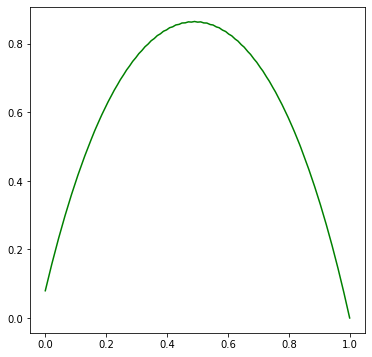

In [42]:
xs_u = np.linspace(0, 1, 10 * N)
plt.figure(figsize=(6, 6))
plt.plot(xs_u, u(xs_u, res, e), 'g')